**torch_MNIST.ipynb**

In [ ]:
import numpy as np
import torch
import torch.nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms

from torch.utils.data import DataLoader
from torch.autograd import Variable

import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
batch_size = 16
learning_rate = 0.0002
num_epoch = 10

In [ ]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [ ]:
print(mnist_train.__getitem__(0)[0].size(), mnist_train.__len__())
print(mnist_test.__getitem__(0)[0].size(), mnist_test.__len__())

torch.Size([1, 28, 28]) 60000
torch.Size([1, 28, 28]) 10000


In [ ]:
# 각 라벨별로 몇 개의 데이터가 있는지 확인
count = [0]*10 # 0을 가진 리스트를 만듦
print(count)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
for i in range(mnist_train.__len__()):
  count[mnist_train.__getitem__(i)[1]] += 1

print(count)

[11846, 13484, 11916, 12262, 11684, 10842, 11836, 12530, 11702, 11898]


In [ ]:
# mnist 사용가능한 함수들을 확인하기
dir(mnist_train)
print(mnist_train.__dict__)

{'root': './', 'transform': ToTensor(), 'target_transform': None, 'transforms': StandardTransform
Transform: ToTensor(), 'train': True, 'data': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [

In [ ]:
only_data = mnist_train.__dict__["data"]
only_data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
only_label = mnist_train.__dict__["targets"]
only_label

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
idx_0 = (only_label == 0) # 라벨이 0인 위치에 True 표시한 텐서
idx_1 = (only_label == 1) # 라벨이 1인 위치에 True 표시한 텐서

print(idx_0)
print(idx_1)
print(idx_0 + idx_1) # True + False = True 인 텐서

tensor([False,  True, False,  ..., False, False, False])
tensor([False, False, False,  ..., False, False, False])
tensor([False,  True, False,  ..., False, False, False])


In [ ]:
print(torch.sum(idx_0)) # 위에서 확인한 각 라벨이미지의 갯수와 일치함
print(torch.sum(idx_1)) 
print(torch.sum(idx_0 + idx_1)) 

tensor(5923)
tensor(6742)
tensor(12665)


In [ ]:
print(idx_0.nonzero()[:, 0]) # 0이 아닌 위치의 index 리턴해 줌

tensor([    1,    21,    34,  ..., 59952, 59972, 59987])


In [ ]:
new_idx = (idx_0 + idx_1).nonzero()[:, 0] # 숫자 0과 숫자 1을 제외한 나머지 이미지의 인덱스가 리턴된다. 
print(new_idx)

tensor([    1,     3,     6,  ..., 59984, 59987, 59994])


In [ ]:
new_data = torch.index_select(only_data, 0, new_idx)
new_label = torch.index_select(only_label, 0, new_idx)

print(new_data)
print(new_label)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
# 새로운 데이터로 대체
mnist_train.__dict__["data"] = new_data
print(mnist_train.__dict__["data"])

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
# 새로운 라벨로 대체
mnist_train.__dict__["targets"] = new_label
print(mnist_train.__dict__["targets"])

tensor([0, 1, 1,  ..., 1, 0, 1])


In [ ]:
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)

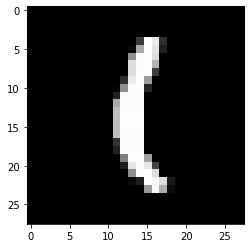

tensor(1)


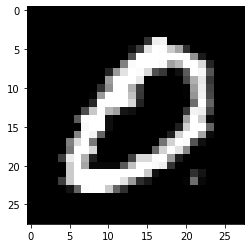

tensor(0)


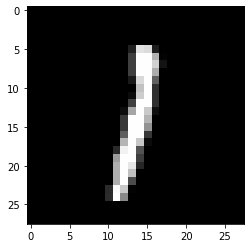

tensor(1)


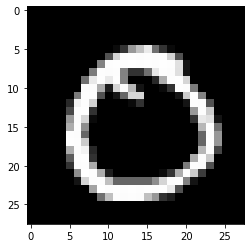

tensor(0)


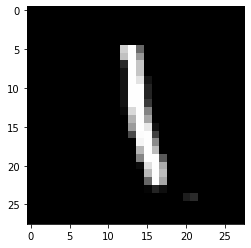

tensor(1)


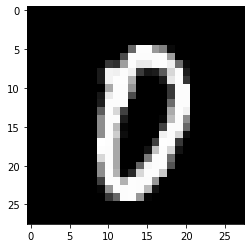

tensor(0)


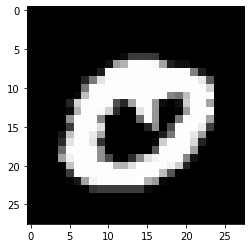

tensor(0)


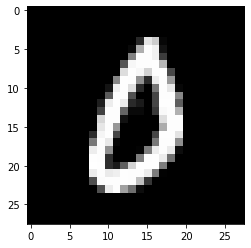

tensor(0)


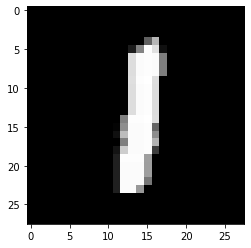

tensor(1)


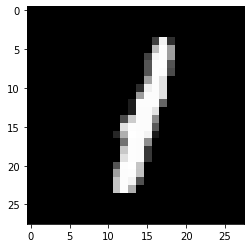

tensor(1)


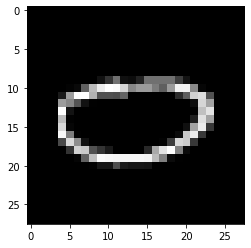

tensor(0)


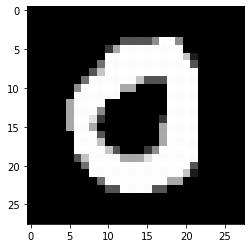

tensor(0)


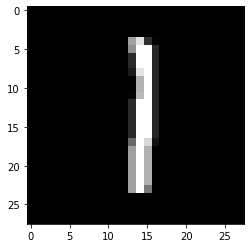

tensor(1)


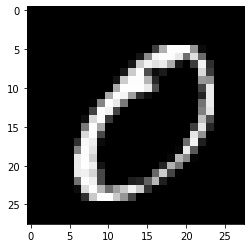

tensor(0)


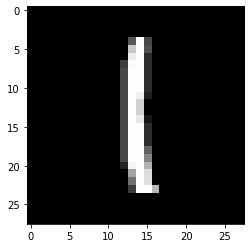

tensor(1)


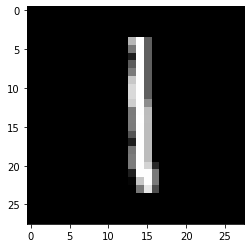

tensor(1)


In [ ]:
for image, label in train_loader:
  img = image.numpy()
  for i in range(batch_size):
    plt.imshow(img[i, 0, :, :], cmap="gray")
    plt.show()
    print(label[i])
  break